In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
from utils_all import *
%matplotlib inline
from matplotlib.pyplot import hist2d, xlim, ylim
import matplotlib.ticker as ticker
import seaborn as sns

# XY coords exploration, feature engineering and clustering

In [2]:
%store -r DATA_NUM_CL_WITH_NAN_TXT

In [3]:
data_cl = DATA_NUM_CL_WITH_NAN_TXT

In [4]:
data_xy = data_cl[['meta_name','x_coords','y_coords']]

In [5]:
data_xy.head()

,meta_name,x_coords,y_coords
3,name,26.0,1245.0
8,name,15.0,200.0
10,location,15.0,313.0
11,name,15.0,200.0
14,description,15.0,493.0


In [6]:
def draw_hex(meta_name, df, ylim=(960,0), xlim=(0,1000)):
    dataXY = df[df.meta_name == meta_name]
    try:
        smpl = dataXY.sample(1000)
    except Exception as e:
        smpl = dataXY
    g = sns.jointplot(x=smpl.x_coords, y=smpl.y_coords, kind='scatter', ylim=ylim, xlim=xlim)

    g.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(100))
    g.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(100))

    plt.show()

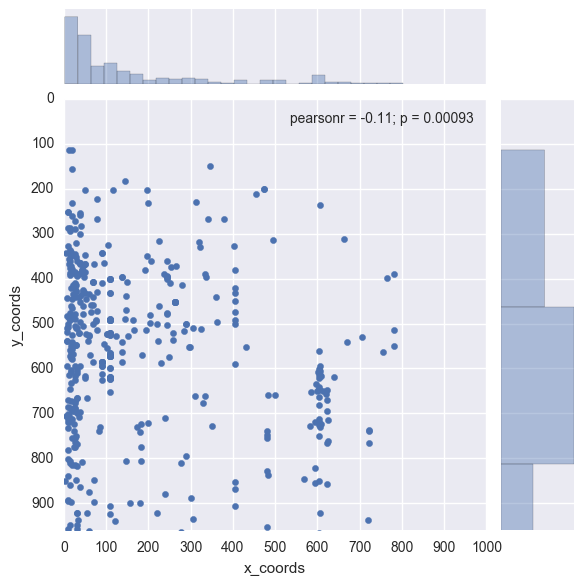

In [7]:
draw_hex('location', data_xy)

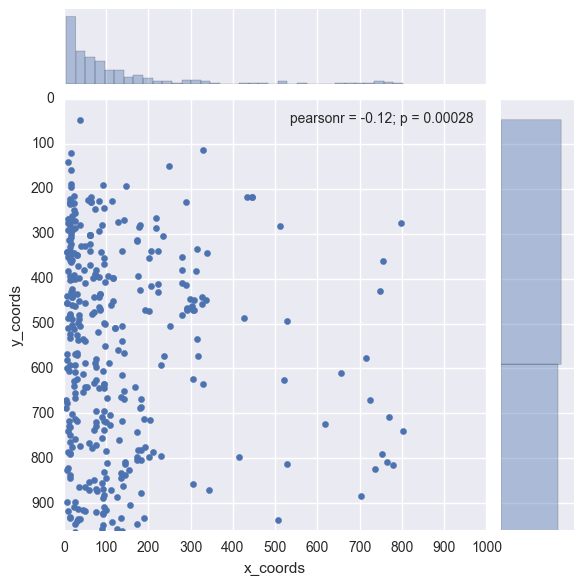

In [8]:
draw_hex('startDate', data_xy)

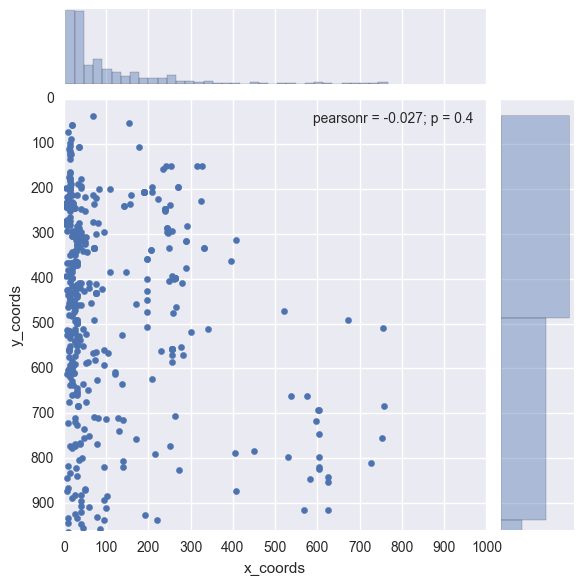

In [40]:
draw_hex('name', data_xy)

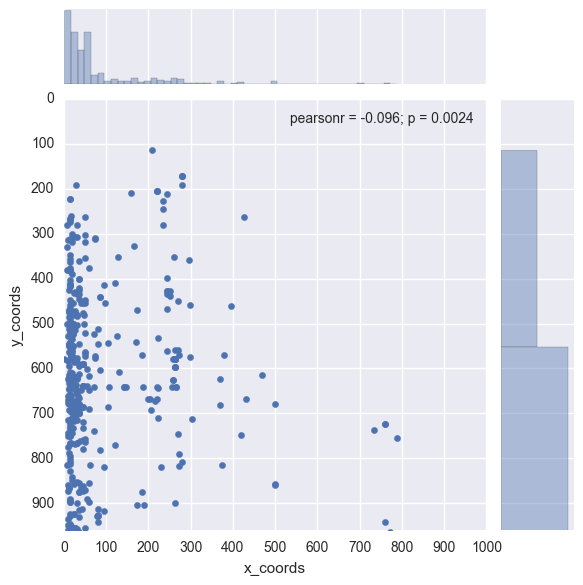

In [10]:
draw_hex('description', data_xy)

## Extract the center of rectangular block

In [11]:
data_rect = data_cl[['meta_name','x_coords','y_coords', 'block_height', 'block_width']]

In [12]:
data_rect['x1'] = data_rect.x_coords
data_rect['y1'] = data_rect.y_coords

In [13]:
data_rect['x2'] = data_rect.x_coords + data_rect.block_width
data_rect['y2'] = data_rect['y1']

In [14]:
data_rect['x3'] = data_rect['x1']
data_rect['y3'] = data_rect['y1'] + data_rect.block_height

In [15]:
data_rect['x4'] = data_rect['x3'] + data_rect.block_width
data_rect['y4'] = data_rect['y3']

In [16]:
data_block_centers = pd.DataFrame()
data_block_centers['x_coords'] = data_rect.x1 + (data_rect.x2 - data_rect.x1)/2
data_block_centers['y_coords'] = data_rect.y1 + (data_rect.y3 - data_rect.y1)/2
data_block_centers['meta_name'] = data_rect.meta_name

Dataframe with the centers of corresponding blocks

If the average web page size is 960 pixels and the average screen width is 1024 pixel
https://www.iteracy.com/blog/post/size-and-layout-of-a-web-page

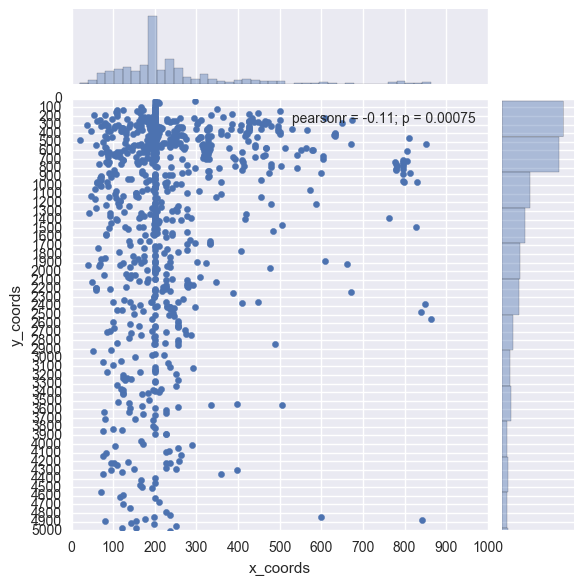

In [17]:
draw_hex('name', data_block_centers, ylim=(5000,0))

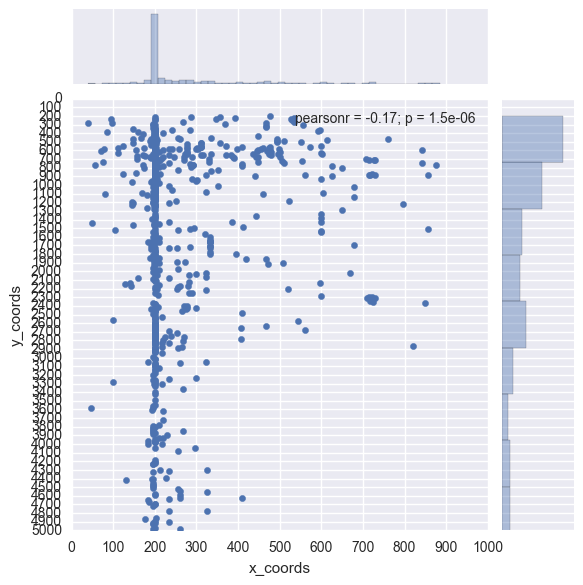

In [18]:
draw_hex('description', data_block_centers, ylim=(5000,0))

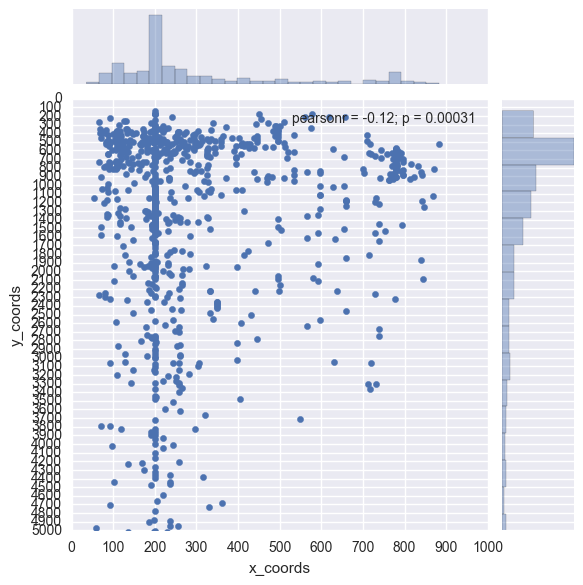

In [19]:
draw_hex('location', data_block_centers,  ylim=(5000,0))

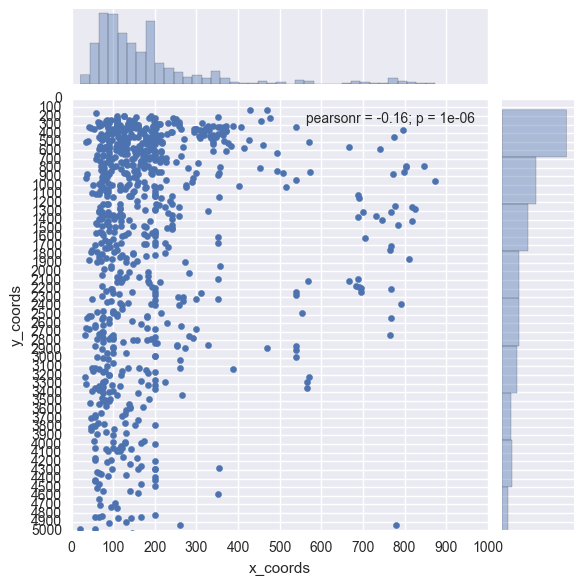

In [20]:
draw_hex('startDate', data_block_centers,  ylim=(5000,0))

In [21]:
data_block_centers.columns = ['x_center', 'y_center', 'meta_name']

In [22]:
xy_data = pd.concat(axis=1, objs=
          [
            data_cl[['x_coords','y_coords', 'block_height', 'block_width']],
            data_block_centers
          ])

meta_name
description          [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
location             [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
name                 [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
not_event_element    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
startDate            [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
dtype: object

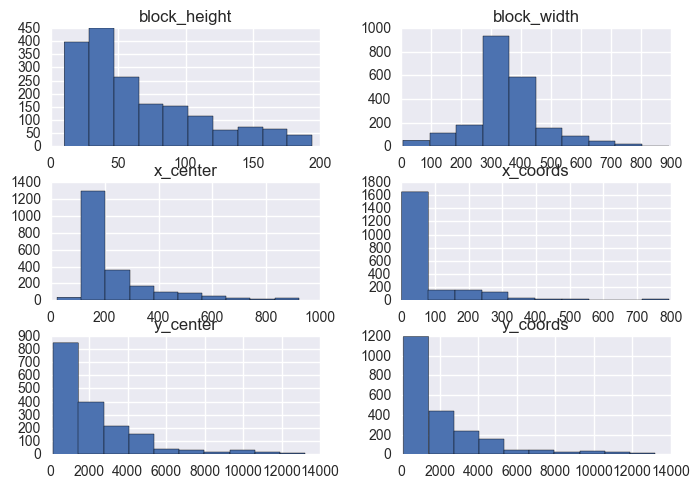

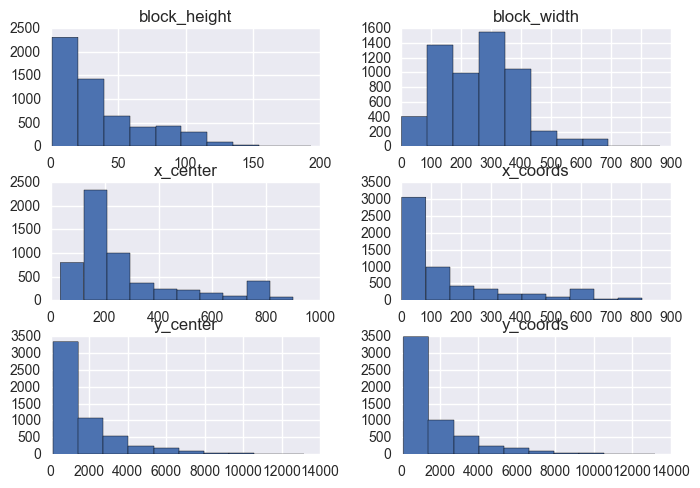

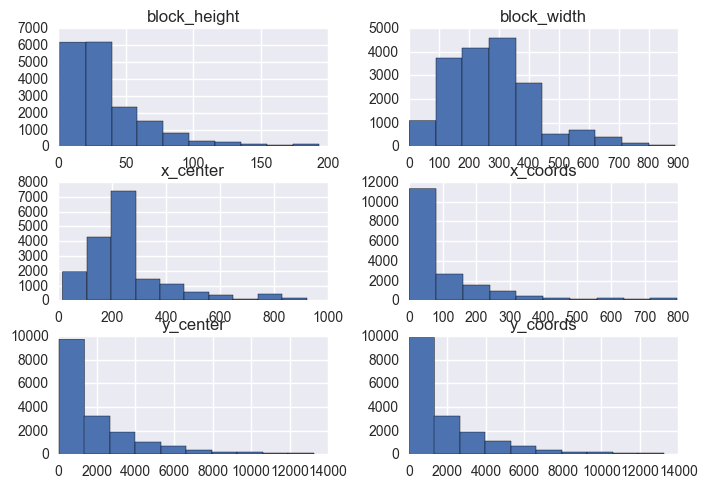

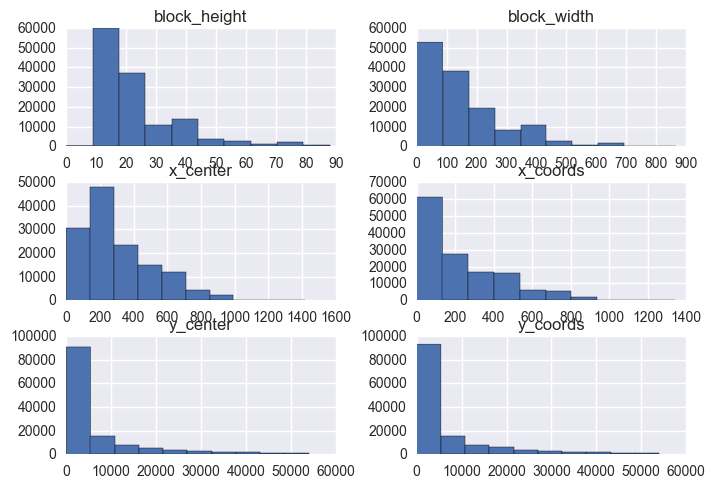

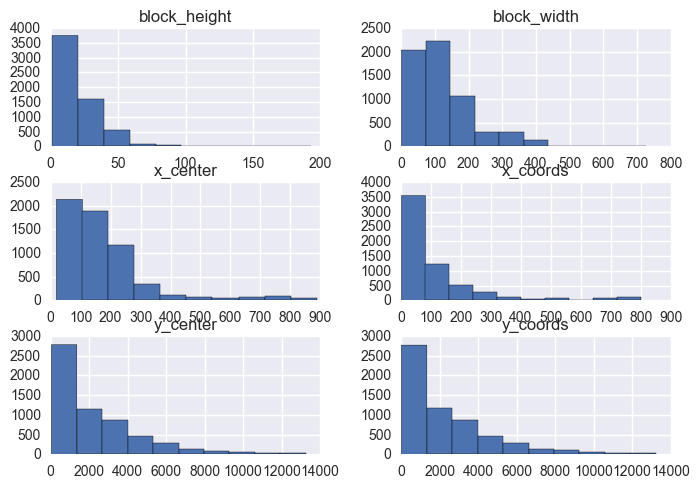

In [23]:
xy_data.groupby('meta_name').hist()

meta_name
description          Axes(0.125,0.125;0.775x0.775)
location             Axes(0.125,0.125;0.775x0.775)
name                 Axes(0.125,0.125;0.775x0.775)
not_event_element    Axes(0.125,0.125;0.775x0.775)
startDate            Axes(0.125,0.125;0.775x0.775)
Name: block_width, dtype: object

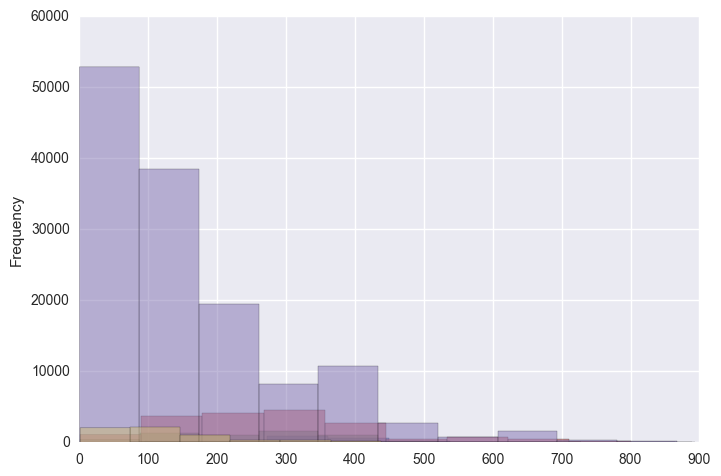

In [24]:
xy_data.groupby('meta_name').block_width.plot(kind='hist', alpha=0.5)

meta_name
description          Axes(0.125,0.125;0.775x0.775)
location             Axes(0.125,0.125;0.775x0.775)
name                 Axes(0.125,0.125;0.775x0.775)
not_event_element    Axes(0.125,0.125;0.775x0.775)
startDate            Axes(0.125,0.125;0.775x0.775)
Name: block_height, dtype: object

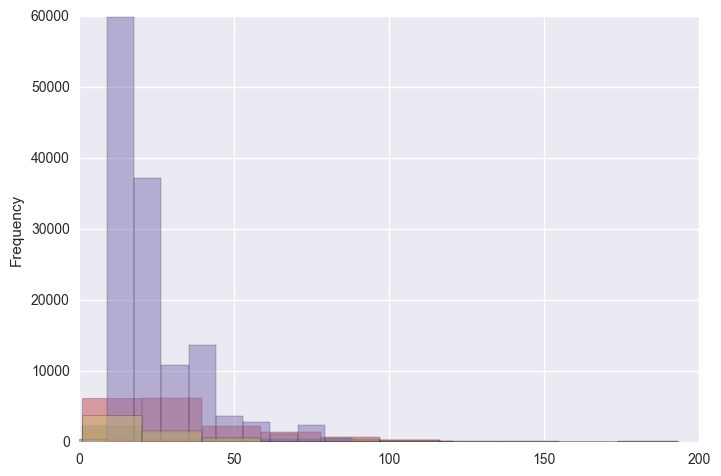

In [25]:
xy_data.groupby('meta_name').block_height.plot(kind='hist', alpha=0.5)

meta_name
description          Axes(0.125,0.125;0.775x0.775)
location             Axes(0.125,0.125;0.775x0.775)
name                 Axes(0.125,0.125;0.775x0.775)
not_event_element    Axes(0.125,0.125;0.775x0.775)
startDate            Axes(0.125,0.125;0.775x0.775)
Name: x_center, dtype: object

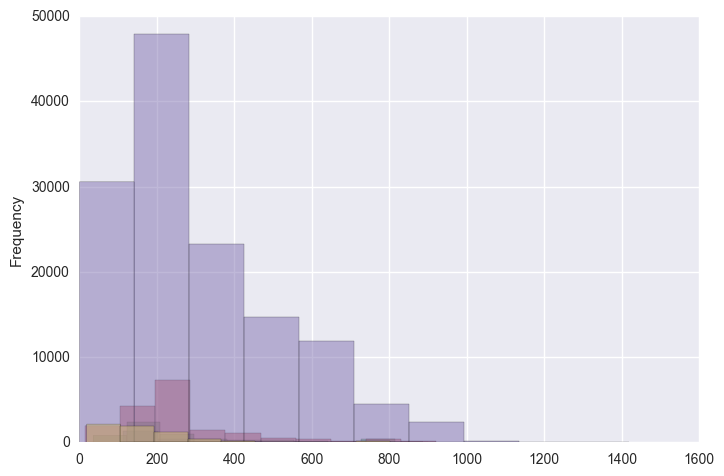

In [26]:
xy_data.groupby('meta_name').x_center.plot(kind='hist', alpha=0.5)

meta_name
description          Axes(0.125,0.125;0.775x0.775)
location             Axes(0.125,0.125;0.775x0.775)
name                 Axes(0.125,0.125;0.775x0.775)
not_event_element    Axes(0.125,0.125;0.775x0.775)
startDate            Axes(0.125,0.125;0.775x0.775)
Name: y_center, dtype: object

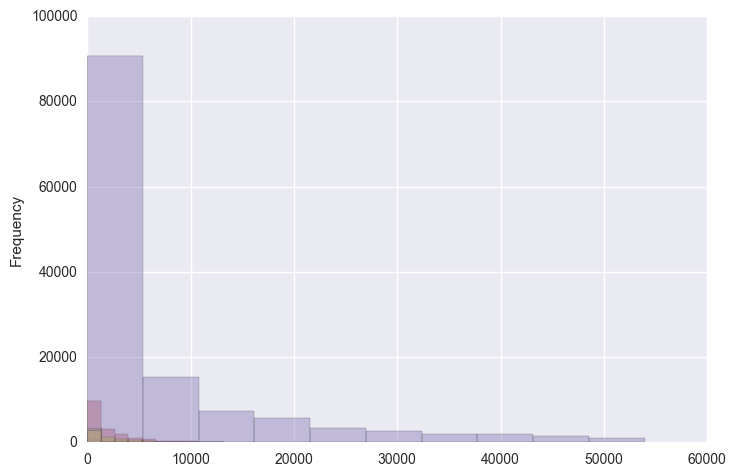

In [27]:
xy_data.groupby('meta_name').y_center.plot(kind='hist', alpha=0.4)

meta_name
description          Axes(0.125,0.125;0.775x0.775)
location             Axes(0.125,0.125;0.775x0.775)
name                 Axes(0.125,0.125;0.775x0.775)
not_event_element    Axes(0.125,0.125;0.775x0.775)
startDate            Axes(0.125,0.125;0.775x0.775)
Name: x_coords, dtype: object

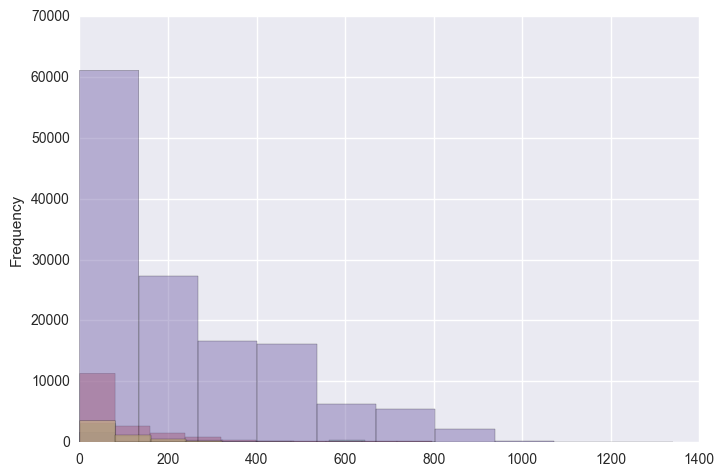

In [28]:
xy_data.groupby('meta_name').x_coords.plot(kind='hist', alpha=0.5)

meta_name
description          Axes(0.125,0.125;0.775x0.775)
location             Axes(0.125,0.125;0.775x0.775)
name                 Axes(0.125,0.125;0.775x0.775)
not_event_element    Axes(0.125,0.125;0.775x0.775)
startDate            Axes(0.125,0.125;0.775x0.775)
Name: y_coords, dtype: object

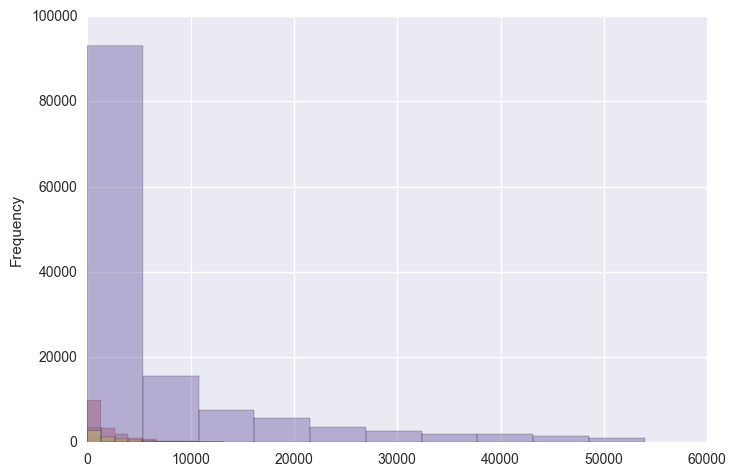

In [29]:
xy_data.groupby('meta_name').y_coords.plot(kind='hist', alpha=0.5)

In [30]:
xy_data.groupby('meta_name').describe()

block_height    block_width       x_center  \
meta_name                                                              
description       count    1784.000000    2170.000000    2163.000000   
                  mean       65.537556     349.120276     262.183773   
                  std        44.929030     121.100181     136.943515   
                  min        10.000000       6.000000      23.500000   
                  25%              NaN            NaN            NaN   
                  50%              NaN            NaN            NaN   
                  75%              NaN            NaN            NaN   
                  max       194.000000     893.000000     920.500000   
location          count    5653.000000    5772.000000    5654.000000   
                  mean       39.750044     260.905579     283.679165   
                  std        31.215797     127.358776     194.771351   
                  min         1.000000       1.000000      35.500000   
                  25%              NaN            NaN            NaN   
                  50%              NaN            NaN            NaN   
                  75%              NaN            NaN            NaN   
                  max       193.000000     865.000000     900.000000   
name              count   17877.000000   18038.000000   17712.000000   
                  mean       38.479331     278.008538     247.230183   
                  std        29.980854     146.163343     154.041683   
                  min         1.000000       1.000000      14.500000   
                  25%              NaN            NaN            NaN   
                  50%              NaN            NaN            NaN   
                  75%              NaN            NaN            NaN   
                  max       193.000000     889.000000     920.500000   
not_event_element count  132781.000000  135435.000000  135214.000000   
                  mean       23.771142     157.363126     305.979392   
                  std        13.568142     134.160766     210.947071   
                  min         0.000000       0.000000       0.000000   
                  25%              NaN            NaN            NaN   
                  50%              NaN            NaN            NaN   
                  75%              NaN            NaN            NaN   
                  max        88.000000     867.000000    1418.000000   
startDate         count    6056.000000    6103.000000    5969.000000   
                  mean       23.301849     128.210716     178.257665   
                  std        14.152083      93.232643     146.426048   
                  min         1.000000       1.000000      19.000000   
                  25%              NaN            NaN            NaN   
                  50%              NaN            NaN            NaN   
                  75%              NaN            NaN            NaN   
                  max       193.000000     728.000000     887.500000   

                              x_coords       y_center       y_coords  
meta_name                                                             
description       count    2199.000000    1763.000000    2184.000000  
                  mean       86.510687    2348.692286    2107.554487  
                  std       125.017421    2356.275997    2261.262099  
                  min         1.000000     120.500000     115.000000  
                  25%              NaN            NaN            NaN  
                  50%              NaN            NaN            NaN  
                  75%              NaN            NaN            NaN  
                  max       794.000000   13226.000000   13196.000000  
location          count    5662.000000    5565.000000    5691.000000  
                  mean      152.047863    1857.475382    1832.412406  
                  std       183.606927    1943.527906    1947.194196  
                  min         2.000000     120.500000     114.000000  
       

In [31]:
xy_data.shape

(167872, 7)

In [32]:
xy_centers = xy_data[['x_center','y_center']]

## X Y clustering

Conclustion: We don't see clustering structure for X,Y coordinates

In [41]:
from sklearn.cluster import KMeans

In [42]:
xy_meta_ceanters = xy_data[['x_center','y_center', 'meta_name']]

In [43]:
xy_meta_ceanters = xy_meta_ceanters.fillna(xy_meta_ceanters.mean())

In [44]:
xy_name = xy_meta_ceanters[xy_meta_ceanters.meta_name == 'name'].drop_duplicates(subset=['x_center'])
xy_descr = xy_meta_ceanters[xy_meta_ceanters.meta_name == 'description'].drop_duplicates(subset=['x_center'])
xy_date = xy_meta_ceanters[xy_meta_ceanters.meta_name == 'startDate'].drop_duplicates(subset=['x_center'])
xy_not_event = xy_meta_ceanters[xy_meta_ceanters.meta_name == 'not_event_element'].drop_duplicates(subset=['x_center'])
xy_loc = xy_meta_ceanters[xy_meta_ceanters.meta_name == 'location'].drop_duplicates(subset=['x_center'])

In [45]:
estimators = {'xy_name_3': KMeans(n_clusters=3),
              'xy_name_8': KMeans(n_clusters=8)}

In [46]:
est = KMeans(n_clusters=3)

In [50]:
def cluster_viz(df, k, name):
    est = KMeans(n_clusters=k)
    df['cluster'] = est.fit_predict(df[['x_center','y_center']].values)
    df.cluster.value_counts()

    sns.lmplot('x_center', 'y_center',
               data=df,
               fit_reg=False,
               hue="cluster",  
               scatter_kws={"marker": "D", "s": 100})
    plt.title('X,Y coordinates of {} colored by corresponding cluster'.format(name))
    plt.gca().invert_yaxis()
    
    return df

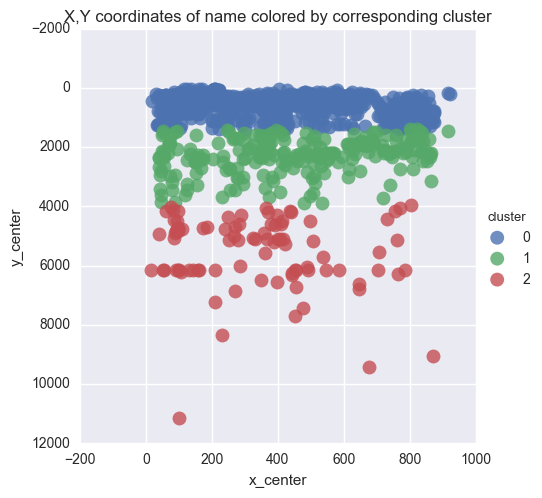

In [53]:
xy_name = cluster_viz(xy_name, 3, 'name')

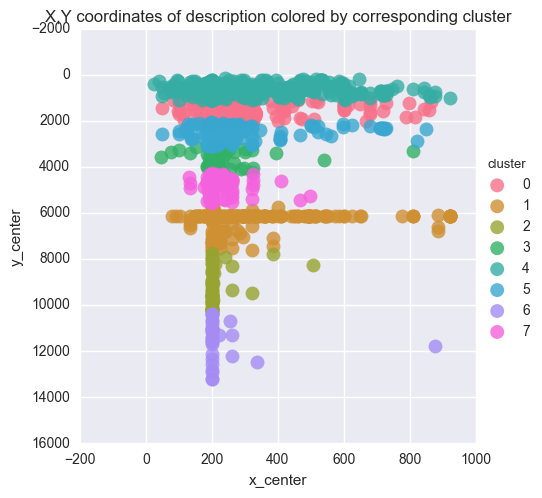

In [50]:
xy_descr = cluster_viz(xy_descr, 8, 'description')

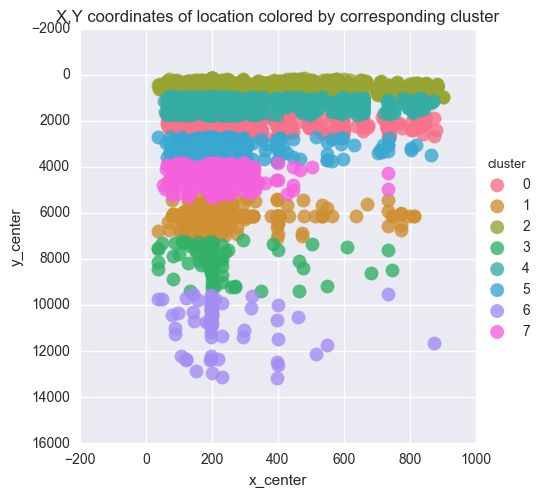

In [51]:
xy_loc = cluster_viz(xy_loc, 8, 'location')

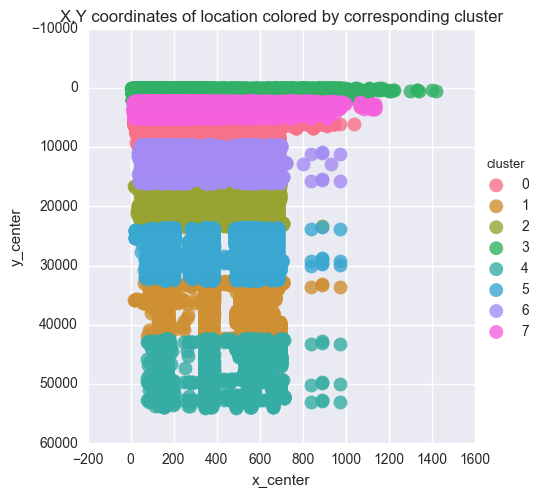

In [52]:
xy_not_event = cluster_viz(xy_not_event, 8, 'location')

In [53]:
data_cl = pd.concat([data_cl, xy_centers], axis=1)

In [38]:
DATA_NUM_CL_WITH_NAN_TXT_XY = data_cl

In [39]:
%store DATA_NUM_CL_WITH_NAN_TXT_XY

Stored 'DATA_NUM_CL_WITH_NAN_TXT_XY' (DataFrame)


In [40]:
import h5py
DATA_NUM_CL_WITH_NAN_TXT_XY.to_hdf('store.h5', 'DATA_NUM_CL_WITH_NAN_TXT_XY')